# Introduction

## What is NoSQL ? SQL vs NoSQL

NoSQL stands for "Not only SQL", every database that does not use SQL(Structured Query Language) is called NoSQL even though every NoSQL DB does not work the same way. The difference between SQL and NoSQL databases is really just a comparison of relational vs. non-relational databases. Deciding when to use SQL vs. NoSQL depends on the kind of information you’re storing and the best way to store it. Both types store data, they just store data differently.

A csv (or RDBMS) works but is it really efficient ? Imagine a scenario with even more nested data (each author has an aff, an aff can have a list a members, each members has an age, ...).You could create different tables but each time you will need to join information of this different tables. That's where NoSQL comes in to save the day.


Modifying the architecture in SQL is clunky. A lot of time is invested designing the data model because changes will impact all or most of the layers in the application.

NoSQL is:
- Meant for unstructured data.
- Designed to manage lots of traffic and data.
- Has no predefined schema.
- Easy to query.

The biggest advantage of NoSQL is that you get to skip the "understand your data and usage patterns" steps. But is it really an advantage ?

NoSQL cons:
- Don't really know what you are working with
- Multiplicity of different DB (Meaning different "language" for some)
- Flexible but can become messy so watch out

IMO: Use SQL when you have a Static data flow or the change in the data is not regular and if the data fits in a row-column format. It's always better to have a good structure even if it asks to put a lot of work before hand. If you need flexibility or the data is really nested using Nosql DBs reduces the need for joins and lookups, making your queries faster.

![test](./img/DB_piechart.png "Title")

<p style="text-align: center;"><b>Non exhaustive list of companies using NoSQL</b></p>

<table><tr>
<td> <img src="./img/Google.png" alt="Drawing" style="width: 150px;"/> </td>
<td> <img src="./img/Amazon logo.png" alt="Drawing" style="width: 150px;"/> </td>
<td> <img src="./img/Facebook.png" alt="Drawing" style="width: 150px;"/> </td>
<td> <img src="./img/Mozilla.png" alt="Drawing" style="width: 150px;"/> </td>
<td> <img src="./img/netflix.png" alt="Drawing" style="width: 150px;"/> </td>
<td> <img src="./img/Twitter.png" alt="Drawing" style="width: 150px;"/> </td>
</tr></table>

# Chapter I - Unstructured Data

## Structured vs Unstructured vs Semi-structured.

Structured Data:
- Row and column format (or can be easily converted to row and column)
- Fixed length/width
- Missing values = Blank
- Storage formats: CSV, TXT, XLS.

Semi-Structured or Unstructured Data:
- Contains tags, keys or other markers.
- Nested or hierarchical data.
- Avoid messy translations into a relational data mode.
- Storage formats: JSON, XML, HTML, Pickle.

N.B: Unstructured Data might be an abuse of language. Every data is structured in some way or your computer would not be able to understand it. Data is atleast semi-structured. Information in the other hand... An image has structured date (pixel by pixel, author, date, type,...) but the information in an image is unstructured (The computer does not understand that on the image there's a "red car", as an observer you structure this information by gathering the pixel and the information becomes structured).

### Text

Strings are the main sources of semi-structured data. Hence emails, logs, words document, ... are all considered unstructured-data.  

### Dict

A dictionary is a collection which is unordered, changeable and indexed by keys. There's multiple options to save a dict. Below is one of these option using the JSON format. What exactly is JavaScript Object Notation (JSON) ?

*JSON is an open standard file format, and data interchange format, that uses **human-readable** text to store and transmit data objects consisting of **attribute–value pairs** and array data types.* - Wikipedia

JSON comes as an alternative to XML. "Extensible Markup Language (XML) is a markup language that defines a set of rules for encoding documents in a format that is both human-readable and machine-readable."

### Sound and Image

Working with sound is out of the scope of this course but they are an important source of unstructured data (self-driving cars, Google image, Youtube, Twitch, ...). You already know the persistent storage for sound and music (png, jpg, waw, mp3, ...)

## Scale it up

Now imagine you have huge amount of semi-structured data in form of a dict. For example you can request 30M tweets with the name of the person who tweeted, the text, the date, the language, the comments,...

You could store it in a JSON or a Pickle file. Problem arise when you try to open it back. You maybe don't want to load every tweets in your memory (RAM and time issues) but with these format there's no other choices. Maybe you also want to store this 30M on an other machine and connect to it from a small laptop. All of this shows you the limitation of storing semi-structured data. As for the structured format where you went from csv to SQL DBs you can also go from JSON to noSQL DBs.

## Vocabulary

Before going in depth between the different types of NoSQL DBs we will talk a bit about the vocabulary used in the Databases context. Don't worry you do not need to know all of them by heart or understand everything at this point but when you encounter them later you can come back here if needed:

- **Persistent storage**: "a system that outlives (persists more than) the process that created it" wikipedia. You create a Python object, say a list or a dict, when you close the Python session you lose this object. Before closing it you save this item as a pickle or .txt file: it becomes persistent. 
- **CRUD**: Create Replace Update Delete (CRUD) are the most basic operations you can perform on persistent storage. 
- **Database transaction**: Sum of operations done in one go, the bank example is often used. First you debit an account (1st operation) then you credit the other account (2nd operation). The whole is a transaction.
- **Distributed data store**: Data are stored on different nodes (computers if you want), if one node is down you can still access your data on other nodes (You usually put **Replica Sets** on different nodes)
- **ACID**: 
    - **Atomicity**, either every operations in the transaction is complete or none (total success or total fail so as to avoid incomplete transactions). 
    - **Consistency**, DBs live on a set of rules (Primary Key, Constraints,...). At the end of the transactions theses rules are still respected.
    - **Isolation**, in the context of concurrent transaction the result is the same as sequential transactions.
    - **Durability**, once a transaction is committed it becomes persistent. 
    
Read more about ACID compliance and NoSQL ([Is there any NoSQL data store that is ACID compliant?](https://dba.stackexchange.com/questions/185763/why-are-nosql-databases-not-acid-compliant), [Why are NoSQL databases not ACID compliant?](https://stackoverflow.com/questions/2608103/is-there-any-nosql-data-store-that-is-acid-compliant))

- **CAP theorem**: It is impossible for a distributed data store to simultaneously provide more than two out of the following three guarantees : Consistency, Availability and Partition tolerance.

## NoSQL types

- **Key-value** stores -> `Redis`
- **Document** stores -> `MongoDB`
- **Wide column** stores -> `Cassandra`
- **Graph** databases -> `Neo4j`

### Key-value stores

A key-value store is the simplest possible data model: it's a storage system that stores values indexed by a key (kinda like a dict). The key is generally an id, identifier or a primary key and the value associated is a binary object, the system does not really handle the value (blackbox). 

- pros: scalable and fast
- cons: for simple data and simple queries (query limited on key since values are black-box)

### Document stores

A document-oriented database extends the key-values model in the sense that values are stored in a structured format called document that the database can understand (i.e it's no longer a blackbox). Therefore you are no longer limited in the queries and you can perform CRUD operations on keys but also values. This allows the user to fetch entire page of information (for example blogs that contain a specific keyword) and is much more appreciated by websites storing a lot of informations. Structure is the following : *DB - Collection - Document*

- pros: Extension of key-value (value examinable), complex query.

- cons: Slow for updating (not a problem as long you can have your index in RAM), difficult to query when keys are constantly changing.


### Wide column store

"It uses tables, rows, and columns, but unlike a relational database, the names and format of the columns can vary from row to row in the same table" (wikipedia) i.e it's more flexible than the typical SQL DB but it's not the only difference.

- pros: works well with flat data with similar scheme
- cons: No complex query (Average, sum,...), hard to change the structure.

### Graph DBs

DB that consists of nodes (individuals/agent) which are connected by edges (relation between the two individuals). Each node and edge have proprety (e.g individuals has different characteristics and they are connected in a certain way defined by the property)

- pros and cons can be resumed by the fact that they are specific to graph data and nothing else.


# Chapter II - MongoDB

MongoDB is a cross-platform document-oriented database program. Classified as a NoSQL database program.Each database in MongoDB contains collections. A collection is an organized store of documents. A document is a way to organize data as a set of key-value pairs.

MongoDB uses JSON-like documents (BSON) with optional schemas. MongoDB is a document-oriented DB, i.e it is designed to retrieve and manage document-oriented information, also known as semi-structured data.

Why do we do a focus on MongoDB in this course ?

- https://db-engines.com/en/ranking

## Connect to MongoDB

First, MongoDB server should be installed. Consider using MongoDB Compass to visualize and manage DBs easily.

To connect via python, do the following :

```python
import pymongo

# open connection at port 27017
client = pymongo.MongoClient('localhost', 27017)

# connect to or create a DB
mydb = client["DBname"]

# connect to or create a Collection
collection = mydb["example"]
```

**So we have the following hierarchy : Server (client) - Database - Collection - Set of documents**

## CRUD Operations

### Create - insert documents

```python
# Having a single dictionary
my_doc = {"authors" : ["Auteur1","Auteur2","Auteur3"], "title" : "Title"}

# Inserting this single dict in mongodb
collection.insert_one(my_doc)

# Having multiple documents at once (a list of dicts, like JSON)
multiple_docs = [{"authors" : ["Auteur1","Auteur2","Auteur3"], "title" : "Title"},
                 {"authors" : ["Author"], "title" : "Title"}]

# Inserting this set of dicts in mongodb
collection.insert_many(multiple_docs)


```

### Read - query data

```python
# Get existing collections
mydb.list_collection_names()

# Get a document in the connected collection
collection.find_one()

# Get all docs
collection.find()

# Fetch a specific doc
collection.find_one({"title":"Title"})

# Fetch all matches
collection.find_many({"title":"Title"})
```

### Update - modify existing data

```python
# Update one doc
collection.update({"title" : "Title"}, {"$set" : {"title" : "Modified_title"}}, upsert = False)
# to add the doc when it is not found, upsert = True

# Update a set of docs
collection.update({"x" : 1}, {"$inc" : {"x" : 3}})
# We increment by 3 the value of key x for all docs having a x = 1
                                        
# Update then return
doc = collection.find_one_and_update({'author': "not_mike"}, {'$set': {'author': "Mike"}})
print(doc)
```

### Delete

```python
# Delete one
collection.delete_one({'x': 4})

# Delete all
collection.delete_many({'x': 4})
```

## Speed up query with an Index

If no id is specified mongo creates automatically a 12-byte ObjectId for each inserted item :
- a 4-byte timestamp value, representing the ObjectId’s creation, measured in seconds since the Unix epoch
- a 5-byte random value
- a 3-byte incrementing counter, initialized to a random value

You can also create your own index to speed up queries. The key used as an index shoud then be present in every document in the collection.

```python
# Create an index on a key
collection.create_index([ ("user_id", 1) ])
```

What does creating an index exactly do ? Creates a new column with ordered index. Indexes improve the speed of search operations in database because instead of searching the whole document, the search is performed on the indexes that holds only few fields.
Look up the documentation to learn more about index and some things to speed up queries
https://docs.mongodb.com/manual/tutorial/optimize-query-performance-with-indexes-and-projections/

## Security with MongoDB

At the moment we only worked on MongoDB on localhost, but in a company you'll probably connect to a distant MongoDB.
If you want to remotely access a server you need to understand some security protocol.

- Bindip: The IP address that mongos or mongod binds to in order to listen for connections from applications. You may attach mongos or mongod to any interface. When attaching mongos or mongod to a publicly accessible interface, ensure that you have implemented proper authentication and firewall restrictions to protect the integrity of your database. 127.0.0.1 is the default bindip = localhost. 0.0.0.0 every ip adress on your network becomes the hostname.

- You need a security protocol to avoid random people connecting to your DB: Setup an authenticate protocol and disallow entrant connection in your firewall (except a whitelist of ip adress you'll use to connect to the host).

If you open your company connection and something goes wrong, you will be held responsible and could get fired. Only use it if you are sure you understand what is going on. Chances are if you go into a company you won't have to setup all this, all you will have to do is use the username, password and hostip they give you. Most of the time companies uses something called MongoDB Atlas.

## MongoDB Atlas

- Automated Security Features, you don't have to bother with Ip stuff, MongoDB Atlas do it for you.
- Built-In Replication. If one of their server is down you can still access your DB.
- Backups and Point-In-Time Recovery - helps you go back in time (sort of like a versioning type of thing), if you mess up (corrupt your DB) than you can use a previous version of your DB.
- Fine-Grained Monitoring — Tons of info/graph.
- Automated Patching and One-Click Upgrades

Read more on https://medium.com/@nparsons08/mongodb-atlas-technical-overview-benefits-9e4cff27a75e

## Store an Image (similar for music, vids...)

```python
# we have an image
from PIL import Image
image = Image.open('path/im.png')

## Convert it to a numpy array
# packages
import numpy as np
from bson.binary import Binary
import pickle
# img to np array
data = np.asarray(image)
#init dict
post = {}
# pickle dump the numpy array and then binarize it (reminder MongoDB = Bson = Bytes json)
post['image'] = Binary( pickle.dumps( data, protocol=2) ) 

# Insert
import pymongo
collection.insert_one(post)

## Load back
docs = collection.find()
# load the binary object
doc =  pickle.loads(next(docs)["image"])
# From numpy to img
image = Image.fromarray(doc)
```

## Cases from homeworks

### Regex - Delete every paper that was published prior 2015

*First I define the regex pattern of years that we should keep. Then I delete all papers that were not published this year*

```python 
# Create pattern of years
from datetime import date

end_year = date.today().year
range_years = list(range(2015, end_year+1))

pattern = '|'.join([str(y) for y in range_years])
pattern
```

        '2015|2016|2017|2018|2019|2020|2021'
    
```python
# Delete old papers
collection.delete_many({"published" : {'$not' : {'$regex' : pattern}}})
```

### Regex case insensitive - Find the number of articles with "technology" in their title or abstract

```python
# Find papers containing 'technology', case insensitive 'i'
tech = collection.find({
    "$or": [
        {"title": { '$regex': 'technology', '$options': 'i'}},
        {"summary": { '$regex': 'technology', '$options': 'i'}}
    ]
})
# Count them
len(list(tech))
```

        1992
        
### List-value size - How many paper have a single author ? Two authors ?

*Authors are stored in an array, so we can match papers with x authors by matching `authors` arrays of size x*

```python
authors = collection.find({"authors" : {"$size" : 1}})
print(len(list(authors)))
authors = collection.find({"authors" : {"$size" : 2}})
len(list(authors))
```

        7570
        17829
        
### Last inserted document - 4) What's the last paper inserted in the db ?

```python
collection.find_one(sort=[('_id', -1)])
```



### Missing value - Find articles with missing arxiv_comment

```python
# Find papers with missing comments
missing_comment = collection.find({'arxiv_comment' : None})
len(list(missing_comment))
```

        34022
        
### Existing value - What's the number of articles that have an arxiv_affiliation

```python
# Count papers having the arxiv_affiliation key
arxiv = collection.find({"arxiv_affiliation" : {'$exists' : True}})
len(list(arxiv))
```

        1768
        
### Not missing - What's the number of articles that have at least one affiliation AND keywords.

*Not sure about the question meaning. I assume that we search for papers that have at least one affiliation AND at least one keyword*

*Affiliations can be found in the `authors` field after the words `affil str` and keywords are given in the `meshwords` field. Because we want at least one in both fields, there is no need to check for duplicates. So we want to match `affil str` in `authors` and not null `meshwords`.*

```python
# Query 1+ keywords 1+ affil
res = collection.find({
    "$and": [
        {"authors": { '$regex': 'affil str'}},
        {"meshwords": { '$ne': None}}
    ]
})
len(list(res))
```

        48893
        
### Check for any duplicates

*The simplest way may be to look for duplicates in the key index*

```python
# Find duplicates
dup = collection.aggregate([{"$group" : {"_id" : "$id", "count" : {"$sum" : 1}}}, # get the count for each ids
                       {"$match" : {"count" : {"$gt" : 1}}}, # match those appearing multiple times
                       {"$project" : {"id" : "$_id"}}]) # return ids of these matched items
len(dup)
```

        2669

### Regex starts with - Remove every articles where summary starts with an "R"

```python
# Remove papers with an abstract starting with an "R"
collection.delete_many({"summary" : {"$regex" : '^R'}})
```



# Chapter III - Neo4j

## Short intro to graph theory

To understand Neo4j you need some intuition to graph theory.

Graph theory is the study of graphs (usually called networks in our domain). Graphs are mathematical structures used to model pairwise relations (edges) between objects (nodes). A graph can be either undirected (symetrical relation) or directed (asymetrical realtion). An edge connects only two nodes (It can be twice the same node). Here's an example of a graph:

<img src="img/network.png" style="width: 600px; height: 450px;">


### Adjacency matrix
A network can be represented as an adjacency matrix. The row names and col names of this matrix is the names of the node. The cells are the relation between nodes. This matrix is symetric if the network is undirected. If directed the rows are the starting point of the edge (also called "source") and the columns are the end ("target"). Here's the adjacency matrix for the previous network:

/  | Spider-man | Nick Fury | Capitain America | Iron man | 
--- | --- | --- | --- | --- |
Spider-man | 0 | 0 | 0 | 0 |
Nick Fury | 1 | 0 | 0 | 0 |
Capitain America | 1 | 1 | 0 | 1 |
Iron man | 1 | 1 | 0 | 0 |

### Edge list

An edge list is composed of three columns: A source, a target and a weight. In others words we focus on the edge instead of the node. A source is the node from which the edge is going out and the target the node where the edge comes in. Here's the edge list of the previous network:

| Source | Target | Weight | 
| --- | --- | --- |
| Nick Fury | Spider-man | 1 |
| Capitain America | Spider-man | 1 |
| Capitain America | Nick Fury | 1 |
| Capitain America | Iron man | 1 |
| Iron man | Spider-man | 1 |
| Iron man | Nick Fury | 1 |

### Incidence matrix

An incidence matrix is probably the less used format. It's a matrix where the columns are the edges and the rows the nodes.


/  | edge 1 | edge 2 | edge 3 | edge 4 | edge 5 | edge 6 | 
--- | --- | --- | --- | --- | --- | --- |
Spider-man | 0 | -1 | 0 | 0 | -1 | -1 |
Nick Fury | -1 | 0 | 0 | -1 | 0 | 1 |
Capitain America | 1 | 1 | 1 | 0 | 0 | 0 |
Iron man | 0 | 0 | -1 | 1 | 1 | 0 |

## Connect to Neo4j

Neo4j server is required and using Neo4j Desktop is convenient to visualize and manage DBs. The schema is a bit different. There are different servers (or set of DBs). Once a server is started, we can open it to access its DBs via the Neo4j Browser. Each DB is a set of nodes and edges (a graph). Before connecting with python, we need to start a server.

To connect with python :

```python
import py2neo

# Connect to a DB
graph = py2neo.Graph("bolt://localhost:7687", password = "pwd", name="DB_name")
```

## CRUD Operations

In neo4j we use the **Cypher** query language.

### Create

```python
# create a constraint on the key so as it is unique (primary key)
try:
    graph.run("CREATE CONSTRAINT ON (n:Person) ASSERT n.id_ IS UNIQUE")
except:
    print("Constraint already exists")
# the key will be the id_ attribute

# init data for nodes
transaction_list = []

# write the transaction - query
transaction = "UNWIND $json as data CREATE (n:Person) SET n = data"
# json will be replaced by the data when we commit

for i in range(10000):
    # attributes for the node
    id_ = i
    name = names[str(np.random.random(3).argmax())]
    age = int(np.random.randint(low=20, high=60, size=1)[0])
    # Append a dict, 1 dict per person 
    transaction_list.append({"id_":id_,"name":name,"age":age})
    # insert every 1000 operations
    if i % 1000 == 0:
        graph.run(transaction, json = transaction_list)
        transaction_list = [] # reset

# commit a last time in case 1000 is not a divider of N
graph.run(transaction, json = transaction_list)

# init data for edges
transaction_list = []

# python object for edges - relationships
for i in range(20,40,1):
    transaction_list.append({"id_1":i,"id_2":(i+1)})
# we link some nodes with dicts of ids

# write the query
transaction = """UNWIND $json as data
MATCH (a:Person),(b:Person)
WHERE a.id_ = data.id_1 AND b.id_ = data.id_2
CREATE (a)-[:COLLAB {n_collab: 1}]->(b)
"""

# commit - insert
graph.run(transaction, json = transaction_list)
```

### Read

```python
query = """
    MATCH (p:Person) 
    WHERE p.height < 180
    ORDER BY p.height
    RETURN p.name, p.height
    """

graph.run(query).to_data_frame()
```

### Update

Use `SET`:

```python
query = """
    MATCH (p:Person) 
    WHERE p.id_ < 10
    SET p.newobs = %s
    RETURN p.id_, p.newobs
    """ % (43)

graph.run(query)
```

### Delete

```python
query = """
    MATCH (p:Person {name : 'John'})
    DETACH DELETE p"""

graph.run(query)
```

## Cases from homeworks

### Degrees - What are the top 10 Co-occurence of tags (stackexchange) ?

```python
query = """MATCH (t1:Tag)-[r:link]-(t2:Tag)
    RETURN t1.name as Tag1, t2.name as Tag2, r.degree as occurrence
    ORDER BY occurrence DESC
    LIMIT 10"""

graph.run(query).to_data_frame()
```

        	Tag1	Tag2	occurrence
        0	...     ...       ...
        
### Degrees - Create a density of node degrees (twitch data)

Here we don't have the degrees as an edge property but we may have multiple identical edges, so the degree is the amount of these.

```python
query = """MATCH (a:User)-[r:FRIEND]-(b:User)
    WITH a, COUNT(r) as n
    RETURN n"""

df = graph.run(query).to_data_frame()
sns.displot(df, x = "n", kind = "kde", log_scale = True)
```

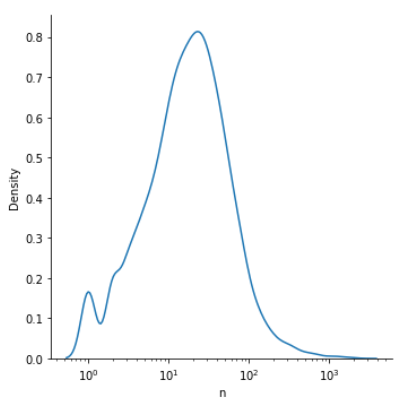

        
### List size - How many authors have more than 2 affiliations ?

```python
query = """MATCH (a:Author)
    WHERE size(a.affiliations) > 2
    RETURN count(a)"""

graph.run(query)
```

         count(a) 
        ----------
            13423
            
### Regex - France top collaborations ?

```python
query = """MATCH (a:Author)-[r:COLLAB]->(b:Author)
    WHERE size(apoc.text.regexGroups(a.affiliations[1], '((?i)France)')) > 0 OR   
          size(apoc.text.regexGroups(b.affiliations[1], '((?i)France)')) > 0
    RETURN a.name, a.affiliations, r.n_collab, b.name, b.affiliations
    ORDER BY r.n_collab DESC
    LIMIT 10"""

graph.run(query).to_data_frame()
```
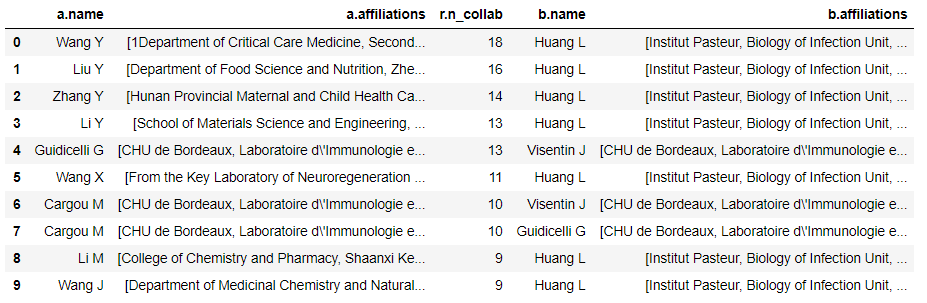

### Count - In how many movies did Tom hanks play ?

```python
query = """MATCH (a:Person {name : 'Tom Hanks'})-[r:ACTED_IN]->(m:Movie)
    RETURN a.name, COUNT(a) as n"""

graph.run(query).to_data_frame()
```

              a.name	  n
        0	Tom Hanks	12
        
### Average - In average in how many movies do actors play in ?

```python
query = """MATCH (a:Person)-[r:ACTED_IN]->(m:Movie)
    WITH a, COUNT(a) as n
    RETURN AVG(n)"""

graph.run(query)
```

                     AVG(n) 
            --------------------
             1.6862745098039222

### Proportion - What is the proportion of writers that also directed the movie ?

```python
query = """MATCH (a:Person)-[r:WROTE]->(m:Movie)<-[d:DIRECTED]-(a)
    MATCH (b:Person)-[w:WROTE]->(n:Movie)
    RETURN (COUNT(DISTINCT(a.name)) / toFloat(COUNT(b))) as Prop"""

graph.run(query)
```

     Prop 
    ------
      0.1